# Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
# Plot preset
%matplotlib inline
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('RdPu') # set custom color scheme
plt.rcParams['figure.figsize'] = (9, 6)

# Data Import

In [3]:
train_raw = pd.read_csv('Data/bank_train.csv')
test_raw = pd.read_csv('Data/bank_test.csv')

In [4]:
print(train_raw.shape)
train_raw.info()

(29387, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29387 entries, 0 to 29386
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         29387 non-null  int64 
 1   job         29387 non-null  object
 2   marital     29387 non-null  object
 3   education   29387 non-null  object
 4   default     29387 non-null  object
 5   balance     29387 non-null  int64 
 6   housing     29387 non-null  object
 7   loan        29387 non-null  object
 8   contact     29387 non-null  object
 9   day         29387 non-null  int64 
 10  month       29387 non-null  object
 11  campaign    29387 non-null  int64 
 12  pdays       29387 non-null  int64 
 13  previous    29387 non-null  int64 
 14  poutcome    29387 non-null  object
 15  subscribed  29387 non-null  object
dtypes: int64(6), object(10)
memory usage: 3.6+ MB


In [5]:
train_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,29,admin.,married,secondary,no,1489,yes,no,cellular,20,apr,1,-1,0,unknown,no
1,33,admin.,single,tertiary,no,3379,no,no,cellular,20,nov,3,-1,0,unknown,no
2,30,management,married,tertiary,no,3134,yes,no,cellular,17,jul,1,-1,0,unknown,no
3,33,admin.,divorced,secondary,no,294,yes,no,cellular,8,may,1,-1,0,unknown,yes
4,42,technician,married,tertiary,no,644,yes,no,unknown,7,may,1,-1,0,unknown,no


In [6]:
train_raw.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Data Transform & EDA

## Target Variable

In [7]:
train_raw.groupby('subscribed').size()

subscribed
no     25949
yes     3438
dtype: int64

In [8]:
train = train_raw.copy()
train['subscribed'] = train_raw['subscribed'].apply(lambda x : 0 if x == 'no' else 1)
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,29,admin.,married,secondary,no,1489,yes,no,cellular,20,apr,1,-1,0,unknown,0
1,33,admin.,single,tertiary,no,3379,no,no,cellular,20,nov,3,-1,0,unknown,0
2,30,management,married,tertiary,no,3134,yes,no,cellular,17,jul,1,-1,0,unknown,0
3,33,admin.,divorced,secondary,no,294,yes,no,cellular,8,may,1,-1,0,unknown,1
4,42,technician,married,tertiary,no,644,yes,no,unknown,7,may,1,-1,0,unknown,0


## Numerical Variables

In [9]:
def pct(category,value):
    temp = train[train[category] == value]['subscribed']
    temp_ys = sum(temp)
    temp_ns = len(temp) - temp_ys
    temp_r = temp_ys/len(temp)
    temp_array = np.array((temp_ys,temp_ns,temp_r))
    return(temp_array)

### Age

In [10]:
category  = 'age'
age = train[category].sort_values().unique()
data_info = pd.DataFrame(columns = ['category', 'value', 'yes', 'no', 'pct'])

for value in age:
    temp = [category, value]
    temp_array = pct(category, value)
    temp.append(temp_array[0])
    temp.append(temp_array[1])
    temp.append(temp_array[2])
    temp = pd.Series(temp, index=['category', 'value', 'yes', 'no', 'pct'])
    data_info = data_info.append(temp, ignore_index = True)
    
data_info

,category,value,yes,no,pct
0,age,18,5.0,3.0,0.625000
1,age,19,5.0,13.0,0.277778
2,age,20,11.0,22.0,0.333333
3,age,21,19.0,40.0,0.322034
4,age,22,25.0,65.0,0.277778
...,...,...,...,...,...
72,age,90,1.0,0.0,1.000000
73,age,92,1.0,0.0,1.000000
74,age,93,1.0,0.0,1.000000
75,age,94,0.0,1.0,0.000000


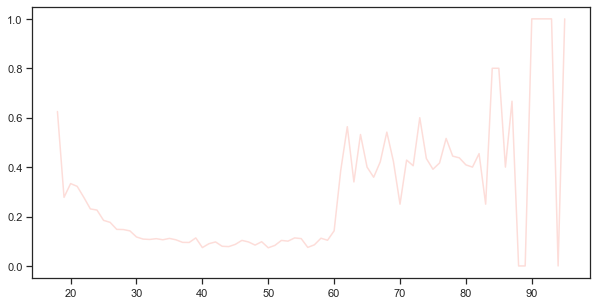

In [11]:
plt.figure(figsize = (10,5))
plt.plot(data_info['value'],data_info['pct'])
plt.show()

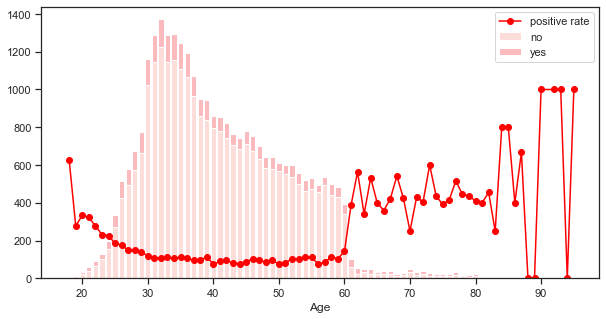

In [12]:
plt.figure(figsize = (10,5))
plt.bar(range(len(age))+age[0],height = data_info['no'], label = 'no')
plt.bar(range(len(age))+age[0],height = data_info['yes'], bottom = data_info['no'], label = 'yes')
plt.plot(data_info['value'],data_info['pct']*1000,'o-',color = 'r', label = 'positive rate')
plt.xlabel('Age')
plt.legend()
plt.show()

## Catergorical Variables

In [13]:
cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
cat_count = []
for column in cat_var:
    cat_count.append({'column':column, 'cat_count':len(train[column].unique())})
    
pd.DataFrame(cat_count)

,column,cat_count
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3


In [14]:
train_no = train[train['subscribed'] == 0]
train_yes = train[train['subscribed'] == 1]

### Job

In [15]:
category  = 'job'
job = train[category].sort_values().unique()
data_info = pd.DataFrame(columns = ['category', 'value', 'yes', 'no', 'pct'])

for value in job:
    temp = [category, value]
    temp_array = pct(category, value)
    temp.append(temp_array[0])
    temp.append(temp_array[1])
    temp.append(temp_array[2])
    temp = pd.Series(temp, index=['category', 'value', 'yes', 'no', 'pct'])
    data_info = data_info.append(temp, ignore_index = True)
    
data_info.sort_values(by='pct', inplace=True)
data_info

,category,value,yes,no,pct
1,job,blue-collar,451.0,5891.0,0.071113
7,job,services,242.0,2460.0,0.089563
3,job,housemaid,73.0,738.0,0.090012
2,job,entrepreneur,91.0,862.0,0.095488
11,job,unknown,19.0,170.0,0.100529
9,job,technician,538.0,4415.0,0.108621
6,job,self-employed,119.0,894.0,0.117473
0,job,admin.,413.0,2979.0,0.121757
4,job,management,846.0,5258.0,0.138598
10,job,unemployed,127.0,709.0,0.151914


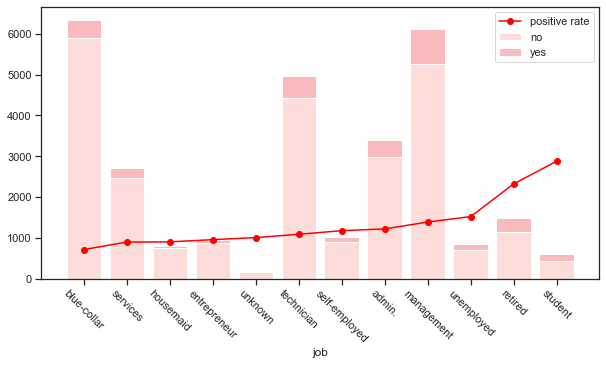

In [16]:
plt.figure(figsize = (10,5))
plt.bar(range(len(job)),height = data_info['no'], label = 'no')
plt.bar(range(len(job)),height = data_info['yes'], bottom = data_info['no'], label = 'yes')
plt.plot(data_info['value'],data_info['pct']*10000,'o-',color = 'r', label = 'positive rate')
plt.xlabel('job')
plt.xticks(rotation = -45)
plt.legend()
plt.show()

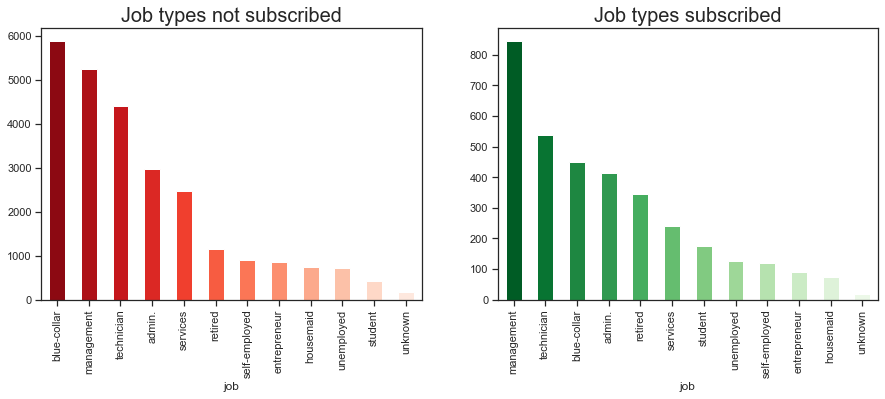

In [17]:
job_group_no = train_no.groupby('job').size()
job_group_yes = train_yes.groupby('job').size()
job_group_count = job_group_no.count()
job_group_no.sort_values(ascending=False, inplace=True)
job_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Job types not subscribed',fontsize=20)
job_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', job_group_count))
plt.subplot(1,2,2)
plt.title('Job types subscribed',fontsize=20)
job_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', job_group_count))
plt.show()

### Marital

In [18]:
category  = 'marital'
marital = train[category].sort_values().unique()
data_info = pd.DataFrame(columns = ['category', 'value', 'yes', 'no', 'pct'])

for value in marital:
    temp = [category, value]
    temp_array = pct(category, value)
    temp.append(temp_array[0])
    temp.append(temp_array[1])
    temp.append(temp_array[2])
    temp = pd.Series(temp, index=['category', 'value', 'yes', 'no', 'pct'])
    data_info = data_info.append(temp, ignore_index = True)
    
data_info.sort_values(by='pct', inplace=True)
data_info

,category,value,yes,no,pct
1,marital,married,1800.0,15774.0,0.102424
0,marital,divorced,413.0,3006.0,0.120796
2,marital,single,1225.0,7169.0,0.145938


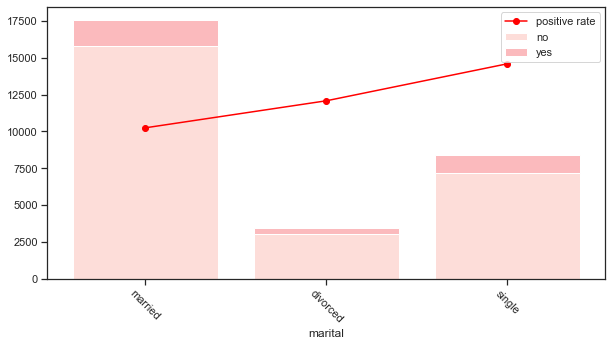

In [19]:
plt.figure(figsize = (10,5))
plt.bar(range(len(marital)),height = data_info['no'], label = 'no')
plt.bar(range(len(marital)),height = data_info['yes'], bottom = data_info['no'], label = 'yes')
plt.plot(data_info['value'],data_info['pct']*100000,'o-',color = 'r', label = 'positive rate')
plt.xlabel(category)
plt.xticks(rotation = -45)
plt.legend()
plt.show()

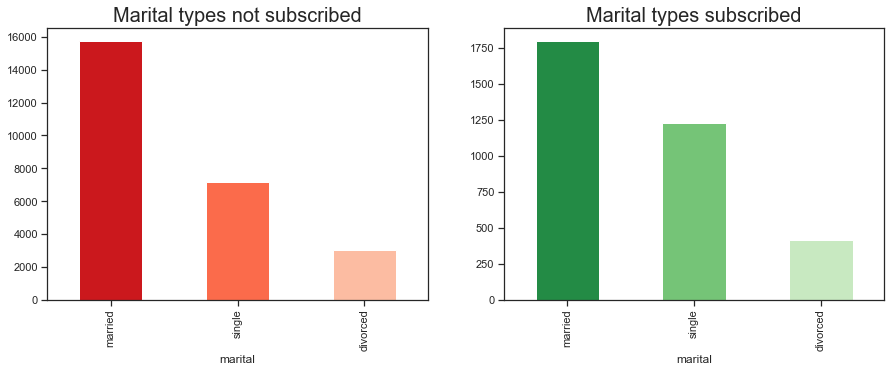

In [20]:
marital_group_no = train_no.groupby('marital').size()
marital_group_yes = train_yes.groupby('marital').size()
marital_group_count = marital_group_no.count()
marital_group_no.sort_values(ascending=False, inplace=True)
marital_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Marital types not subscribed',fontsize=20)
marital_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', marital_group_count))
plt.subplot(1,2,2)
plt.title('Marital types subscribed',fontsize=20)
marital_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', marital_group_count))
plt.show()

### Education

In [21]:
category  = 'education'
education = train[category].sort_values().unique()
data_info = pd.DataFrame(columns = ['category', 'value', 'yes', 'no', 'pct'])

for value in education:
    temp = [category, value]
    temp_array = pct(category, value)
    temp.append(temp_array[0])
    temp.append(temp_array[1])
    temp.append(temp_array[2])
    temp = pd.Series(temp, index=['category', 'value', 'yes', 'no', 'pct'])
    data_info = data_info.append(temp, ignore_index = True)
    
data_info

,category,value,yes,no,pct
0,education,primary,387.0,4069.0,0.086849
1,education,secondary,1588.0,13515.0,0.105145
2,education,tertiary,1301.0,7338.0,0.150596
3,education,unknown,162.0,1027.0,0.136249


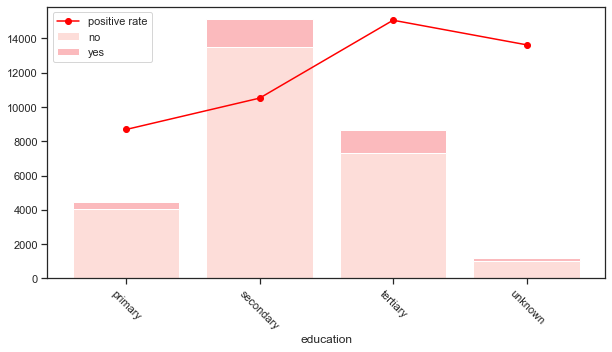

In [22]:
plt.figure(figsize = (10,5))
plt.bar(range(len(education)),height = data_info['no'], label = 'no')
plt.bar(range(len(education)),height = data_info['yes'], bottom = data_info['no'], label = 'yes')
plt.plot(data_info['value'],data_info['pct']*100000,'o-',color = 'r', label = 'positive rate')
plt.xlabel('education')
plt.xticks(rotation = -45)
plt.legend()
plt.show()

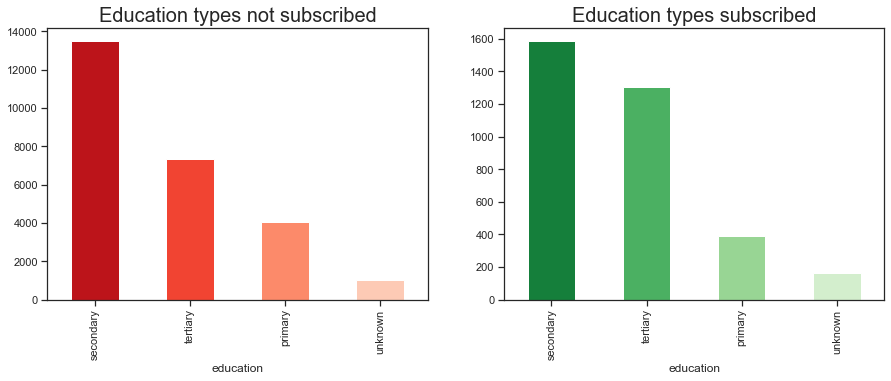

In [23]:
education_group_no = train_no.groupby('education').size()
education_group_yes = train_yes.groupby('education').size()
education_group_count = education_group_no.count()
education_group_no.sort_values(ascending=False, inplace=True)
education_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Education types not subscribed',fontsize=20)
education_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', education_group_count))
plt.subplot(1,2,2)
plt.title('Education types subscribed',fontsize=20)
education_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', education_group_count))
plt.show()

### Default

default
no     25465
yes      484
dtype: int64


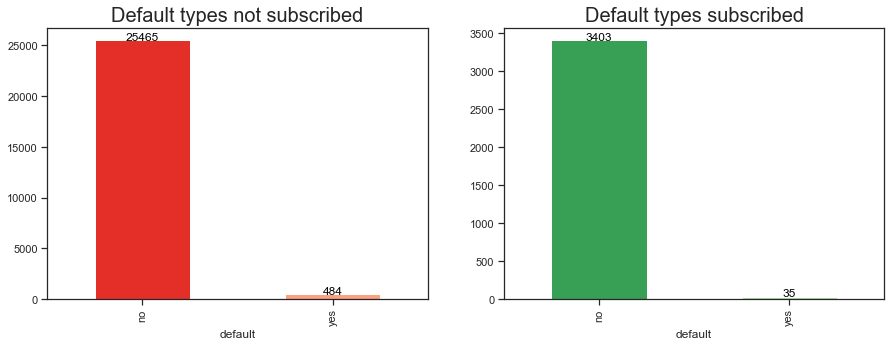

In [24]:
default_group_no = train_no.groupby('default').size()
print(default_group_no)
default_group_yes = train_yes.groupby('default').size()
default_group_count = default_group_no.count()
default_group_no.sort_values(ascending=False, inplace=True)
default_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Default types not subscribed',fontsize=20)
plot_no = default_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', default_group_count))
for index, row in enumerate(default_group_no):
    plot_no.text(index, row, row, color="black", ha="center")
    
plt.subplot(1,2,2)
plt.title('Default types subscribed',fontsize=20)
plot_yes = default_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', default_group_count))
for index, row in enumerate(default_group_yes):
    plot_yes.text(index, row, row, color="black", ha="center")
    
plt.show()

### Housing

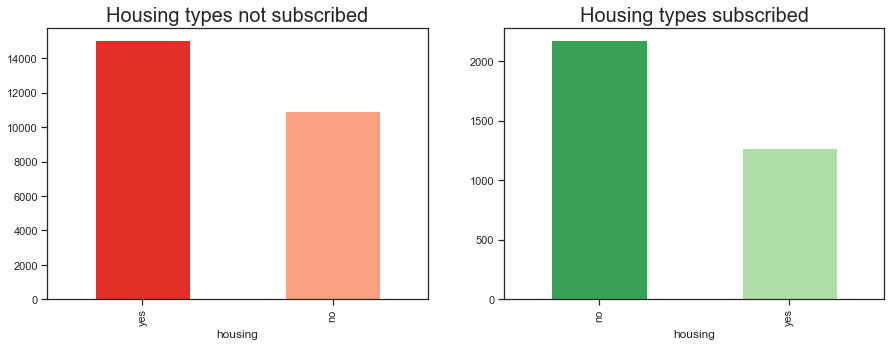

In [25]:
housing_group_no = train_no.groupby('housing').size()
housing_group_yes = train_yes.groupby('housing').size()
housing_group_count = housing_group_no.count()
housing_group_no.sort_values(ascending=False, inplace=True)
housing_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Housing types not subscribed',fontsize=20)
plot_no = housing_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', housing_group_count))

plt.subplot(1,2,2)
plt.title('Housing types subscribed',fontsize=20)
plot_yes = housing_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', housing_group_count))

plt.show()

### Loan

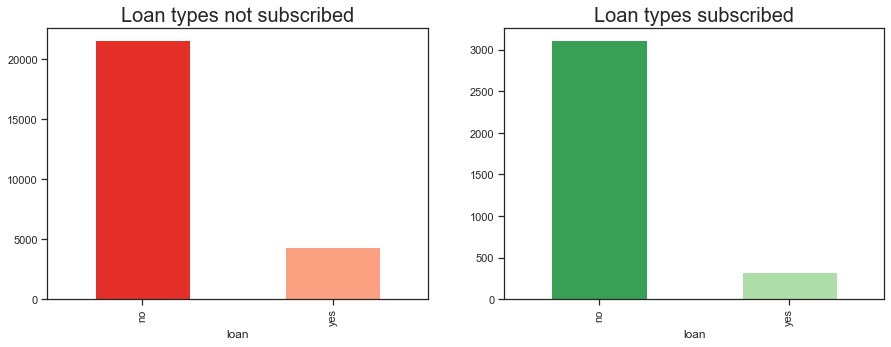

In [26]:
loan_group_no = train_no.groupby('loan').size()
loan_group_yes = train_yes.groupby('loan').size()
loan_group_count = loan_group_no.count()
loan_group_no.sort_values(ascending=False, inplace=True)
loan_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Loan types not subscribed',fontsize=20)
plot_no = loan_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', loan_group_count))

plt.subplot(1,2,2)
plt.title('Loan types subscribed',fontsize=20)
plot_yes = loan_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', loan_group_count))

plt.show()

### Contact

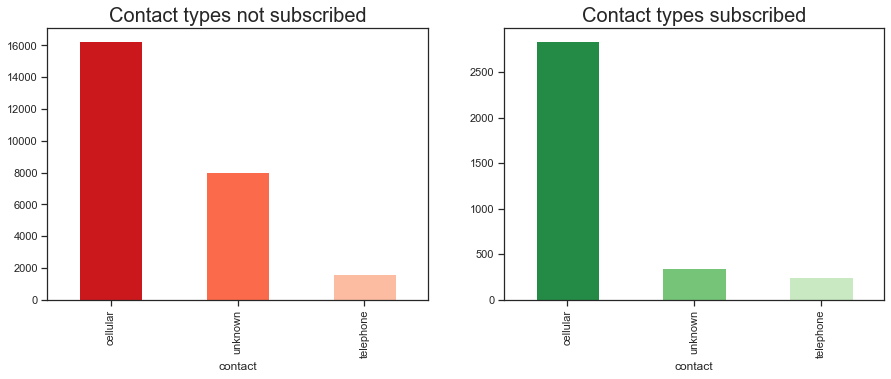

In [27]:
contact_group_no = train_no.groupby('contact').size()
contact_group_yes = train_yes.groupby('contact').size()
contact_group_count = contact_group_no.count()
contact_group_no.sort_values(ascending=False, inplace=True)
contact_group_yes.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Contact types not subscribed',fontsize=20)
plot_no = contact_group_no.plot(kind='bar', color=sns.color_palette('Reds_r', contact_group_count))

plt.subplot(1,2,2)
plt.title('Contact types subscribed',fontsize=20)
plot_yes = contact_group_yes.plot(kind='bar', color=sns.color_palette('Greens_r', contact_group_count))

plt.show()

# Model

## Preparation

In [28]:
cat_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
cat_dummy_train = pd.get_dummies(train[cat_list], drop_first = True)
X = cat_dummy_train
y = train['subscribed']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_full_index, test_index in ss.split(X, y):
    X_train_full, X_test = X.iloc[train_full_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_full_index], y.iloc[test_index]
    
ss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, valid_index in ss.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full.iloc[train_index], X_train_full.iloc[valid_index]
    y_train, y_valid = y_train_full.iloc[train_index], y_train_full.iloc[valid_index]

## Model Fitting

In [44]:
log_reg = LogisticRegression()
clf = log_reg.fit(X_train, y_train)
# Transfer test data to dummies
cat_dummy_test = pd.get_dummies(test_raw[cat_list],drop_first = True)
X_test = cat_dummy_test
# Probability
prob = clf.predict_proba(X_test)
models = []
models.append({'name': 'logit', 'model': log_reg})
pd.DataFrame(prob, columns=['a0', 'a1'])

,a0,a1


In [33]:
def getResult(X, y):
    columns = ['Error Rate', 'Sensitivity', 'Specificity', 'Precision', 'AUC', 'Cross-entropy']
    rows = []
    for model in models:
        rows.append(model['name'])
    results = pd.DataFrame(0.0, columns=columns, index=rows) 
    y_prob = np.zeros((len(y), len(models)))

    for i, model in enumerate(models):
        y_prob[:, i] = model['model'].predict_proba(X)[:, 1]
        y_pred = model['model'].predict(X)

        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel() 

        results.iloc[i,0] = 1 - accuracy_score(y, y_pred)
        results.iloc[i,1] = tp / (tp + fn)
        results.iloc[i,2] = tn / (tn + fp)
        results.iloc[i,3] = precision_score(y, y_pred)
        results.iloc[i,4] = roc_auc_score(y, y_prob[:,i])
        results.iloc[i,5] = log_loss(y, y_prob[:,i])

    table = results.round(3)
    print(table)
    fig, ax = plt.subplots(figsize=(9,6))

    for i in range(y_prob.shape[1]):
        fpr, tpr, thersholds = roc_curve(y, y_prob[:, i])
        auc = roc_auc_score(y, y_prob[:, i])
        ax.plot(1 - fpr, tpr, label=rows[i] + ' (AUC = {:.3f})'.format(auc))

    ax.plot([0,1],[1,0], linestyle='--', color='black', alpha=0.6)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

       Error Rate  Sensitivity  Specificity  Precision    AUC  Cross-entropy
logit       0.117          0.0          1.0        0.0  0.708          0.333


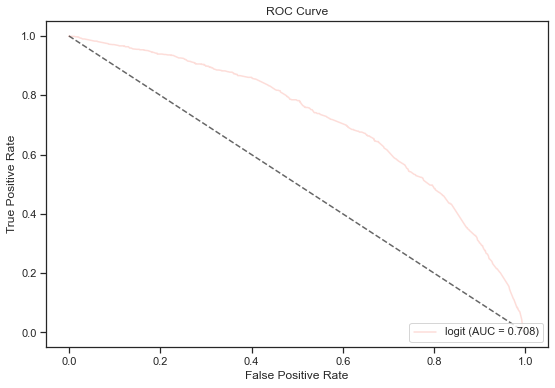

In [35]:
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
getResult(X_valid, y_valid)

In [39]:
log_reg.fit(X_train_full, y_train_full)

LogisticRegression()

       Error Rate  Sensitivity  Specificity  Precision    AUC  Cross-entropy
logit       0.117          0.0          1.0        0.0  0.697          0.335


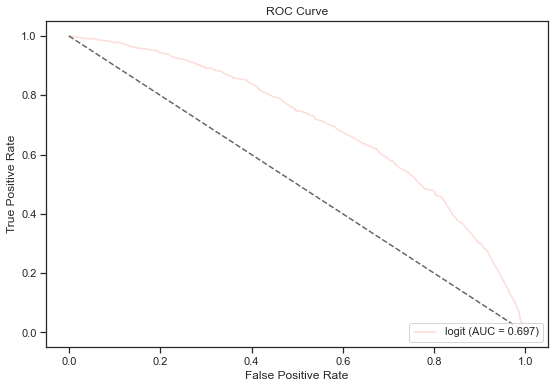

In [40]:
getResult(X_test, y_test)

In [41]:
log_reg.fit(X, y)

LogisticRegression()

       Error Rate  Sensitivity  Specificity  Precision    AUC  Cross-entropy
logit       0.117          0.0          1.0        0.0  0.702          0.334


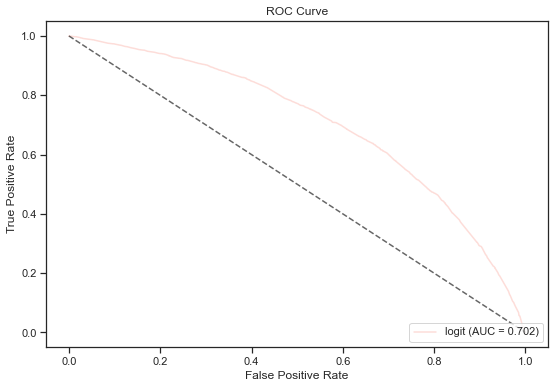

In [42]:
getResult(X, y)

In [105]:
test_pred = test_raw.copy()
test_pred['subscribed'] = prob[:, 1]
test_pred

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,0,43,blue-collar,married,primary,no,517,yes,no,cellular,20,apr,2,263,7,failure,0.075499
1,1,53,unemployed,divorced,secondary,no,587,no,no,cellular,19,nov,1,-1,0,unknown,0.221461
2,2,28,blue-collar,single,primary,no,722,yes,no,unknown,21,may,1,-1,0,unknown,0.032576
3,3,47,blue-collar,married,secondary,no,2548,yes,no,cellular,11,may,1,368,1,other,0.086671
4,4,37,blue-collar,married,secondary,no,1403,no,no,unknown,9,oct,1,-1,0,unknown,0.048820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,15819,50,technician,married,secondary,no,315,no,no,cellular,8,aug,10,-1,0,unknown,0.146326
15820,15820,31,technician,married,secondary,no,30,no,no,telephone,11,aug,5,-1,0,unknown,0.117637
15821,15821,47,technician,married,secondary,no,11,no,no,cellular,21,aug,3,-1,0,unknown,0.146326
15822,15822,60,retired,divorced,secondary,no,1382,no,no,cellular,30,jul,10,-1,0,unknown,0.338729


# Export

In [106]:
submission = test_pred[['id', 'subscribed']]
submission.to_csv("submission.csv",index = False)
submission

,id,subscribed
0,0,0.075499
1,1,0.221461
2,2,0.032576
3,3,0.086671
4,4,0.048820
...,...,...
15819,15819,0.146326
15820,15820,0.117637
15821,15821,0.146326
15822,15822,0.338729
